# Grundlagen der Cognitive Science 

## Perceptron Project

### Organisation

Like the first homework assignment (essay), this programming project is part of the material required to pass the module. 

*Un*like the first homework assignment, this component will be performed in small groups (up to four people). You can work on these exercises in your groups, and help each other to develop and understand the material and code. 

Each group hands in a **single copy** of the notebook at the end of the semester (see the deadlines below). To hand in the notebook you **must** be a member of a group (defined in Moodle). Peer feedback will occur as part of the group work rather than in a separate dedicated week (as in the essay assignment).

Note that different group members can still register for different exam dates (Abgabetermine) in TUCaN. However, if at least one group member registers to submit in the first Abgabetermin, this means that **the group notebook must be handed in at the first deadline**.
Group members who decide to register for the second Abgabetermin can then just hand in their essay; the grade for the group notebook will be copied over.

**DEADLINE: see TUCaN**

If you miss the second deadline, you will not fulfil the necessary requirements of the module!


### Procedure

In the first week of this project (09.01) you will join a group. Please contact Prof. Wallis (thomas.wallis@tu-darmstadt.de) if there are any problems.

The seminar time will mostly be used for you to work in your groups. Prof. Wallis will be available to answer questions. Of course, you may choose to work on the assignments in your own time.

### Glossary

- *training set*: the collection of data you will use to learn weights. Each separate data entry is sometimes called a *trial*, an *exemplar*, an *observation* or a *data point*.
- *epoch*: One epoch corresponds to one complete pass through the training set. After one epoch, each example in the training set has had an opportunity to influence the model weights.

### Numpy functions you may find useful

- [numpy.array](https://numpy.org/doc/stable/reference/generated/numpy.array.html)
- [numpy.inner](https://numpy.org/doc/stable/reference/generated/numpy.inner.html)
- [numpy.ndarray.shape](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html)
- [numpy.empty](https://numpy.org/doc/stable/reference/generated/numpy.empty.html) and [numpy.empty_like](https://numpy.org/doc/stable/reference/generated/numpy.empty_like.html)

GROUP: 

GROUP MEMBERS (AND stud.tu-darmstadt.de EMAIL ADDRESS):



## Task 1 - Definition of a Perceptron

### Task 1.1

**Name and explain in your own words the most important elements of the perceptron. What are they? What function do they fulfill?**

*delete this text and write your answer here*

### Task 1.2

**Write down the mathematical definition of a perceptron (Perceptron lecture slide 14) and relate the parts of the formal definition to the most important elements you wrote about in 1.1 above.**

*delete this text and write your answer here*

## Task 2 - Determine weights for logical rules

Imagine a perceptron that has two inputs A and B. 
These can take values of either 1 (True) or 0 (False).
The perceptron should "fire" (return a 1) when the rule is satisfied, or else not fire (return a 0).

Determine the weights $w_1$ (for input A) and $w_2$ (for input B) and bias $\theta$ to encode the following rules. You don't need to write code here; the goal is for you to think logically about what the weights mean. As a solution, simply filling in the values for the weights below is sufficient.

### Task 2.1.

$(A \wedge B) \vee (\neg A \wedge B)$

### Task 2.2. 

$(A \wedge B) \vee (\neg A \wedge B) \vee (A \wedge \neg B)$

## Task 3 - how to train your Perceptron

**Implement a Perceptron that learns the logical rule AND by training on data.**

To do this, you will sequentially build up a series of functions that will allow you to define and train a perceptron.


In [57]:
from typing import Optional, Tuple

import matplotlib.pyplot as plt
import numpy as np
import inspect

The cell below contains a function definition that currently does nothing (it just contains a `pass`) statement.
However, I've provided detail on the names and types of the inputs, and a docstring that describes what the function should do.
Read the function definition and the docstring, then look at the next cell. 

In [58]:
def compute_error_rate(targets: np.array, output: np.array) -> float:
    """
    Compute the error proportion

    This function computes the proportion of errors given
    a vector of targets and a vector of outputs (predictions
    for the target label). Targets and outputs are assumed to be
    binary (either 0 or 1).

    Hint: there is no need to use a "for" loop in this function.

    Args:
        targets (np.array): A numpy array containing the binary true labels.
        output (np.array): A numpy array containing the predictions.

    Returns:
        float: The proportion of errors between output and target.
    """
    return np.sum  (targets!=output) / len(targets)

The cell below defines a "test": a function that calls the `compute_error_rate` function above, provides some known inputs to the function, and uses an `assert` statement to ask whether the output of the function is equal to a known value.
If the function works as intended, the test will "pass" -- meaning it will not cause an error.
If the function is not working as intended, and the `assert` statement is false, then the function will yield an `AssertionError`.

These `AssertionError`s don't contain much information about what caused the error.
To help you figure out what is failing, I added simple result printing to the tests, to show the values returned by your functions. Compare these results to the target result (the value tested in `assert`), then modify the function until it produces the desired result (i.e. causes no `AssertionError`). 

**Remember to re-run the cell that defines the function** -- Python will use the old version until you explicitly redefine the function.

Once the `compute_error_rate` function works as intended, running the cell below should produce no output.
(Remember: if you change the function, you will need to re-run the cell that defines the function before you re-run the test).

Do not modify the test cell.

In [59]:
# a helper function to make tests easier to understand.
# do not modify.
def test_helper(result, result_name="result") -> None:
    previous_frame = inspect.currentframe().f_back
    caller = inspect.getframeinfo(previous_frame)
    print(f"{caller[2]} {result_name} is {result}\n")

In [60]:
# do not modify this cell
def test_compute_error_rate():
    result = compute_error_rate(
        targets=[0.0, 1.0, 1.0, 0.0, 1.0],
        output=np.array([1.0, 1.0, 1.0, 0.0, 0.0]),
    )
    test_helper(result)
    assert result == 0.4


test_compute_error_rate()

test_compute_error_rate result is 0.4



Now that you have the idea of developing functions and testing them, complete the remaining functions below.
These will provide you with the tools to train perceptrons on any data set, which we will apply further down.

In [61]:
def compute_activation(inputs: np.array, weights: np.array, bias: float = 0.0) -> float:
    """
    Compute the activation of the Perceptron

    This function computes the activation of the
    Perceptron with given inputs, weights and bias.
    The activation is the sum of the weighted inputs
    plus the bias term.

    Hint: try not to use a `for` loop in this function.

    Args:
        inputs (np.array): A numpy array containing the inputs to the perceptron,
                           assumed to be a vector containing one trial with
                           number of dimensions == len(inputs).
        weights (np.array): A numpy array containing the Perceptron's weights for each
                            input dimension. Should contain one entry per dimension.
        bias (float): The value of the Perceptron's bias term. A scalar. Defaults to 0.0.

    Returns:
        float: A float containing the Perceptron's activation.
    """
    return inputs @ weights +bias

In [62]:
def test_compute_activation_1():
    result = compute_activation(
        inputs=np.array([0.0, 1.0, 0.5]), weights=np.array([1.0, 0.5, 0.5])
    )
    test_helper(result)
    assert result == 0.75


def test_compute_activation_2():
    result = compute_activation(
        inputs=np.array([0.0, 0.0, 0.5]), weights=np.array([1.0, 0.5, 0.5])
    )
    test_helper(result)
    assert result == 0.25


def test_compute_activation_3():
    result = compute_activation(
        inputs=np.array([0.0, 0.0, 0.5]), weights=np.array([1.0, 0.5, 0.5]), bias=0.5
    )
    test_helper(result)
    assert result == 0.75


test_compute_activation_1()
test_compute_activation_2()
test_compute_activation_3()

test_compute_activation_1 result is 0.75

test_compute_activation_2 result is 0.25

test_compute_activation_3 result is 0.75



In [63]:
def predict(inputs: np.array, weights: np.array, bias: float = 0.0) -> float:
    """
    Compute the output of a Perceptron

    This function computes the output of a Perceptron with the provided weights and
    bias.

    Args:
        inputs (np.array): A numpy array containing the inputs to the perceptron,
                           assumed to be a vector containing one trial with
                           number of dimensions == len(inputs).
        weights (np.array): A numpy array containing the Perceptron's weights for each
                            input dimension. Should contain one entry per dimension.
        bias (float): The value of the Perceptron's bias term. A scalar. Defaults to 0.0.

    Returns:
        float: A float containing the Perceptron's output.
    """
    if compute_activation(inputs,weights,bias)>0:
        return 1.0
    else:
        return 0.0

In [64]:
def test_predict_1():
    result = predict(
        inputs=np.array([0.0, 1.0, 0.5]),
        weights=np.array([0.1, -0.2, 0.5]),
        bias=0.4,
    )
    test_helper(result)
    assert result == 1.0


def test_predict_2():
    result = predict(
        inputs=np.array([0.0, 0.0, -1.0]),
        weights=np.array([0.1, -0.2, 0.5]),
        bias=0.4,
    )
    test_helper(result)
    assert result == 0.0


test_predict_1()
test_predict_2()

test_predict_1 result is 1.0

test_predict_2 result is 0.0



In [65]:
def compute_delta_w(
    inputs: np.array,
    target: float,
    output: float,
) -> Tuple[np.array, float]:
    """
    Compute the change in weights and bias

    This function computes the change in weights and bias
    according to the learning rule for the Perceptron.

    Args:
        inputs (np.array): A numpy array containing the inputs to the perceptron,
                           assumed to be a vector containing one trial with
                           number of dimensions == len(inputs).
        target (float): The correct output label for this trial. A scalar.
        output (float): The output of the Perceptron (its prediction for the
                           target label). Sometimes called y_hat in notation.

    Returns:
        Tuple[np.array, float]: A two-element Tuple containing (1) the delta for the
                            weights and (2) the delta for the bias term.
    """
    return (np.array((target-output)*inputs),target-output)

In [66]:
def test_compute_delta_w_1():
    delta_w, delta_bias = compute_delta_w(
        target=1.0, output=0.0, inputs=np.array([1.0, 1.0])
    )
    test_helper(delta_w, result_name="delta_w")
    test_helper(delta_bias, result_name="delta_bias")
    assert np.all(delta_w == np.array([1.0, 1.0]))
    assert delta_bias == 1.0


def test_compute_delta_w_2():
    delta_w, delta_bias = compute_delta_w(
        target=1.0, output=1.0, inputs=np.array([1.0, 1.0])
    )
    test_helper(delta_w, result_name="delta_w")
    test_helper(delta_bias, result_name="delta_bias")
    assert np.all(delta_w == np.array([0.0, 0.0]))
    assert delta_bias == 0.0


test_compute_delta_w_1()
test_compute_delta_w_2()

test_compute_delta_w_1 delta_w is [1. 1.]

test_compute_delta_w_1 delta_bias is 1.0

test_compute_delta_w_2 delta_w is [0. 0.]

test_compute_delta_w_2 delta_bias is 0.0



In [67]:
def update_weights(
    inputs: np.array,
    target: float,
    output: float,
    weights: np.array,
    bias: float,
) -> Tuple[np.array, float]:
    """
    Update the Perceptron's weights and bias

    This function computes the new weights and bias for
    the perceptron based on its prediction and the true class
    label, using the Perceptron's learning rule.

    Args:
        inputs (np.array): A numpy array containing the inputs to the perceptron,
                           assumed to be a vector containing one trial with
                           number of dimensions == len(inputs).
        target (float): The correct output label for this trial. A scalar.
        output (float): The output of the Perceptron (its prediction for the
                           target label). Sometimes called y_hat in notation.
        inputs (np.array): A numpy array containing the inputs to the perceptron,
                           assumed to be a vector containing one trial with
                           number of dimensions == len(inputs).
        weights (np.array): A numpy array containing the Perceptron's weights for each
                            input dimension. Should contain one entry per dimension.
        bias (float): The value of the Perceptron's bias term. A scalar. Defaults to 0.0.

    Returns:
        Tuple[np.array, float]: A two-element Tuple containing (1) the updated
                            weights and (2) the updated bias.
    """
    delta_weights, delta_bias= compute_delta_w(inputs,target,output)
   

    return(weights+delta_weights,bias+delta_bias)

In [68]:
def test_update_weights_1():
    delta_w, delta_bias = update_weights(
        weights=np.array([0.0]),
        bias=0.0,
        target=1.0,
        output=1.0,
        inputs=np.array([1.0]),
    )
    test_helper(delta_w, result_name="delta_w")
    test_helper(delta_bias, result_name="delta_bias")
    assert delta_w == np.array([0.0])
    assert delta_bias == 0.0


def test_update_weights_2():
    delta_w, delta_bias = update_weights(
        weights=np.array([0.0]),
        bias=0.0,
        target=1.0,
        output=0.0,
        inputs=np.array([1.0]),
    )
    test_helper(delta_w, result_name="delta_w")
    test_helper(delta_bias, result_name="delta_bias")
    assert delta_w == np.array([1.0])
    assert delta_bias == 1.0


def test_update_weights_3():
    delta_w, delta_bias = update_weights(
        weights=np.array([0.0, 0.0, 0.0, 1.0]),
        bias=0.0,
        target=1.0,
        output=0.0,
        inputs=np.array([0.0, 1.0, 1.0, 0.0]),
    )
    test_helper(delta_w, result_name="delta_w")
    test_helper(delta_bias, result_name="delta_bias")
    assert np.all(delta_w == np.array([0.0, 1.0, 1.0, 1.0]))
    assert delta_bias == 1.0


test_update_weights_1()
test_update_weights_2()
test_update_weights_3()

test_update_weights_1 delta_w is [0.]

test_update_weights_1 delta_bias is 0.0

test_update_weights_2 delta_w is [1.]

test_update_weights_2 delta_bias is 1.0

test_update_weights_3 delta_w is [0. 1. 1. 1.]

test_update_weights_3 delta_bias is 1.0



In [69]:
def train_one_trial(
    inputs: np.array, target: float, weights: np.array, bias: float = 0.0
) -> Tuple[np.array, float, float]:
    """
    Train a Perceptron for a single trial (data example)

    This function computes the output for the Perceptron based on the provided
    inputs, weights and biases, then returns updated weights based on the
    Perceptron's learning rule.

    **Note that the output is defined by the perceptron's state *before*
    the weight update.**

    Args:
        inputs (np.array): A numpy array containing the inputs to the perceptron,
                           assumed to be a vector containing one trial with
                           number of dimensions == len(inputs).
        target (float): The correct output label for this trial. A scalar.
        weights (np.array): As in train_one_epoch.
        bias (float, optional): As in train_one_epock. Defaults to 0.0.

    Returns:
        Tuple[np.array, float, float]: The results of this epoch output as
                                 a Tuple of length 3 containing
                                 (1) the weights after training,
                                 (2) the bias after training,
                                 (3) the output of the perceptron for this trial
    """
    output=predict(inputs,weights,bias)
    weights,bias=update_weights(inputs,target,output,weights,bias)

    return (weights,bias,output)

In [70]:
def test_train_one_trial_1():
    weights, bias, output = train_one_trial(
        inputs=np.array([0.0, 1.0]), target=1.0, weights=np.array([0.0, 0.0])
    )
    test_helper(weights, result_name="weights")
    test_helper(bias, result_name="bias")
    test_helper(output, result_name="output")
    assert np.all(weights == np.array([0.0, 1.0]))
    assert bias == 1.0
    assert output == 0.0


def test_train_one_trial_2():
    weights, bias, output = train_one_trial(
        inputs=np.array([0.0, 1.0]), target=1.0, weights=np.array([0.0, 1.0])
    )
    test_helper(weights, result_name="weights")
    test_helper(bias, result_name="bias")
    test_helper(output, result_name="output")
    assert np.all(weights == np.array([0.0, 1.0]))
    assert bias == 0.0
    assert output == 1.0


def test_train_one_trial_3():
    weights, bias, output = train_one_trial(
        inputs=np.array([1.0, 0.0]), target=0.0, weights=np.array([1.0, 1.0])
    )
    test_helper(weights, result_name="weights")
    test_helper(bias, result_name="bias")
    test_helper(output, result_name="output")
    assert np.all(weights == np.array([0.0, 1.0]))
    assert bias == -1.0
    assert output == 1.0


test_train_one_trial_1()
test_train_one_trial_2()
test_train_one_trial_3()

test_train_one_trial_1 weights is [0. 1.]

test_train_one_trial_1 bias is 1.0

test_train_one_trial_1 output is 0.0

test_train_one_trial_2 weights is [0. 1.]

test_train_one_trial_2 bias is 0.0

test_train_one_trial_2 output is 1.0

test_train_one_trial_3 weights is [0. 1.]

test_train_one_trial_3 bias is -1.0

test_train_one_trial_3 output is 1.0



In [71]:
def train_one_epoch(
    inputs: np.array,
    targets: np.array,
    weights: np.array,
    bias: float,
    verbose: bool = True,
) -> Tuple[np.array, float, np.array, float]:
    """
    Train a Perceptron for one epoch

    This function should train the weights and biases of
    a perceptron over one epoch (one run through all the data).

    The weights and bias will be updated *after* each training
    example (data point or trial). This means that the average
    error computed over the epoch does not reflect the error
    that will result from the final set of weights. For this,
    a new epoch is required.

    Note that definitions of input arguments provided below
    are common to other functions unless noted otherwise.

    Args:
        inputs (np.array): A numpy array containing the inputs to the perceptron.
                           The inputs are often called "X" in notation. If a
                           matrix is passed, the rows are assumed to be "trials"
                           (data examples) and columns are different input dimensions
                           x_1, x_2 etc. If a vector is passed, it is assumed to be
                           one trial with number of dimensions == len(inputs).
        targets (np.array): The correct output labels. Often called "Y" in notation.
                            There should be one entry per row of X if X is a matrix.
        weights (np.array): A numpy array containing the Perceptron's weights for each
                            input dimension. Should contain one entry per dimension.
        bias (float): The value of the Perceptron's bias term. A scalar.
        verbose (bool, optional): If True, print information about the results of training
                                  in this epoch, including weights and bias at the end of
                                  the epoch, and also the overall error in the epoch.
                                  Defaults to True.

    Returns:
        Tuple[np.array, float, np.array, float]: The results of this epoch output as
                                 a Tuple of length 4 containing
                                 (1) the weights after training,
                                 (2) the bias after training,
                                 (3) the outputs of the perceptron on each trial and
                                 (4) the overall error rate for the epoch.
    """
    outputs= np.zeros(len(targets))

    for i in range(len(inputs)):
        # output = predict(inputs[i], weights, bias)
        # weights, bias = update_weights(inputs[i], targets[i], output, weights, bias)

        weights, bias, output =train_one_trial(inputs[i], targets[i], weights, bias)
        outputs[i]=output

    error_rate=compute_error_rate(targets,outputs)

    if verbose:
            print("weights: ",weights)
            print("bias: ", bias)
            print("error rate: ",error_rate) 

    return(weights,bias,outputs,error_rate)       

In [72]:
def test_train_one_epoch_1():
    inputs = np.array([[0.0, 0.5], [0.5, 0.0]])
    targets = np.array([1.0, 1.0])
    weights, bias, epoch_outputs, epoch_error = train_one_epoch(
        inputs=inputs,
        targets=targets,
        weights=np.array([0.0, 0.0]),
        bias=0.0,
        verbose=False,
    )
    test_helper(weights, result_name="weights")
    test_helper(bias, result_name="bias")
    test_helper(epoch_outputs, result_name="epoch_outputs")
    test_helper(epoch_error, result_name="epoch_error")
    assert np.all(weights == np.array([0.0, 0.5]))
    assert np.all(epoch_outputs == np.array([0.0, 1.0]))
    assert epoch_error == 0.5
    assert bias == 1.0


def test_train_one_epoch_2():
    inputs = np.array([[1.0, 0.5], [0.5, 0.0]])
    targets = np.array([1.0, 0.0])
    weights, bias, epoch_outputs, epoch_error = train_one_epoch(
        inputs=inputs,
        targets=targets,
        weights=np.array([0.0, 0.0]),
        bias=0.0,
        verbose=False,
    )
    test_helper(weights, result_name="weights")
    test_helper(bias, result_name="bias")
    test_helper(epoch_outputs, result_name="epoch_outputs")
    test_helper(epoch_error, result_name="epoch_error")
    assert np.all(weights == np.array([0.5, 0.5]))
    assert np.all(epoch_outputs == np.array([0.0, 1.0]))
    assert epoch_error == 1.0
    assert bias == 0.0


test_train_one_epoch_1()
test_train_one_epoch_2()

test_train_one_epoch_1 weights is [0.  0.5]

test_train_one_epoch_1 bias is 1.0

test_train_one_epoch_1 epoch_outputs is [0. 1.]

test_train_one_epoch_1 epoch_error is 0.5

test_train_one_epoch_2 weights is [0.5 0.5]

test_train_one_epoch_2 bias is 0.0

test_train_one_epoch_2 epoch_outputs is [0. 1.]

test_train_one_epoch_2 epoch_error is 1.0



### Task 3.1

Using the functions above, implement a perceptron that can learn the logical rule AND. 

First, define a data set (using numpy arrays) that defines the desired rule. 
For the inputs, each row should be a data exemplar and each column a variable / dimension (i.e. $x_1$, $x_2$, etc).


In [73]:
# In this cell, you should initialise a batch of data
# that exemplifies the desired rule. Specify a numpy array
# of input values stored in the variable "inputs", where each row is a data point and each column
# is an input (A and B).

# inputs = np.array()

# Now specify a numpy array targets (stored in "targets"), which contains the target labels
# ("correct decisions") for each row specified in inputs.

# targets = np.array()

inputs=np.array([[0,0],[0,1],[1,0],[1,1]])
targets=np.array([0,0,0,1])


### Task 3.2

Initialise the weights and bias terms to be all zero, and compute the initial predictions and errors using the `predict` and `compute_error_rate` functions defined above. Print the results. 


In [74]:
# write your solution here.

weights= np.zeros(inputs.shape[1])
bias= 0.0
outputs= np.array([predict(input,weights,bias) for input in inputs])
error_rate= compute_error_rate(targets,outputs)
print("Initial weights: ", weights)
print("Initial bias: ", bias)
print("Initial outputs: ", outputs)
print("Initial error rate: ", error_rate)


Initial weights:  [0. 0.]
Initial bias:  0.0
Initial outputs:  [0. 0. 0. 0.]
Initial error rate:  0.25


### Task 3.3

Train the model for 10 epochs, by writing a `for` loop over the function `train_one_epoch`.

In [75]:
# write your solution here.

for i in range(10):
    weights,bias,outputs,error_rate=train_one_epoch(inputs,targets,weights,bias)

weights:  [1. 1.]
bias:  1.0
error rate:  0.25
weights:  [2. 1.]
bias:  0.0
error rate:  0.75
weights:  [2. 1.]
bias:  -1.0
error rate:  0.75
weights:  [2. 2.]
bias:  -1.0
error rate:  0.5
weights:  [2. 1.]
bias:  -2.0
error rate:  0.25
weights:  [2. 1.]
bias:  -2.0
error rate:  0.0
weights:  [2. 1.]
bias:  -2.0
error rate:  0.0
weights:  [2. 1.]
bias:  -2.0
error rate:  0.0
weights:  [2. 1.]
bias:  -2.0
error rate:  0.0
weights:  [2. 1.]
bias:  -2.0
error rate:  0.0


Answer the following questions in the markdown cell below:

1. What is the final performance of the model? 
2. What are the final weights? 
3. How does the performance change over epochs? 
4. Can a perceptron learn the logical rule AND?

*write your answer here*

### Task 3.4

Training the Perceptron as above is deterministic: starting with all weights set to zero and looping over the dataset N times produces the same result each time. (Confirm this by re-running the cells above multiple times -- remember to set the weights back to zero).

Now, we add randomness in the training by shuffling the order of the training exemplars on each epoch. The first step to do this is to write a function to shuffle the input and target arrays:

In [76]:
def shuffle_arrays(
    inputs: np.array, targets: np.array, seed: Optional[int] = None
) -> Tuple[np.array, np.array]:
    """
    Shuffle the order of exemplars in input and target arrays

    This function shuffles the order of the exemplars (observations)
    in the data inputs and targets. Each call to this function should
    yield a random re-ordering of the rows of the input matrix and a
    matching re-ordering of the entries of the targets vector.

    Hints:
    1. Use numpy's random package. See
    https://numpy.org/doc/stable/reference/random/index.html#random-quick-start
    2. See e.g. https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html
    3. Make sure your function re-orders on the rows of inputs, and preserves
    the column order.

    Args:
        inputs (np.array): A numpy array containing the inputs to the perceptron.
                           The inputs are often called "X" in notation. If a
                           matrix is passed, the rows are assumed to be "trials"
                           (data examples) and columns are different input dimensions
                           x_1, x_2 etc. If a vector is passed, it is assumed to be
                           one trial with number of dimensions == len(inputs).
        targets (np.array): The correct output labels. Often called "Y" in notation.
                            There should be one entry per row of X if X is a matrix.
        seed (Optional[int], optional): If an integer is provided, this
                            will be used as the seed for the random number generator
                            to yield deterministic results. If None (the default),
                            will use the default behaviour of numpy's random number
                            generator.

    Returns:
        Tuple[np.array, np.array]: A two-element Tuple containing the re-ordered arrays.
    """
    rng_num=np.random.default_rng(seed)
    shuffled_num=rng_num.permutation(len(inputs))

    return inputs[shuffled_num], targets[shuffled_num]

In [77]:
def test_shuffle_arrays_1():
    inputs = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
    targets = np.array([1, 0])
    inputs_shuffled, targets_shuffled = shuffle_arrays(
        inputs=inputs, targets=targets, seed=42
    )
    test_helper(inputs_shuffled, result_name="inputs_shuffled")
    test_helper(targets_shuffled, result_name="targets_shuffled")
    assert np.all(inputs_shuffled == np.array([[5, 6, 7, 8], [1, 2, 3, 4]]))
    assert np.all(targets_shuffled == np.array([0, 1]))


def test_shuffle_arrays_2():
    inputs = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
    targets = np.array([1, 0])
    # this seed causes no shuffling (same order):
    inputs_shuffled, targets_shuffled = shuffle_arrays(
        inputs=inputs, targets=targets, seed=1124
    )
    test_helper(inputs_shuffled, result_name="inputs_shuffled")
    test_helper(targets_shuffled, result_name="targets_shuffled")
    assert np.all(inputs_shuffled == inputs)
    assert np.all(targets_shuffled == targets)


def test_shuffle_arrays_3():
    inputs = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
    targets = np.array([1, 0, 2])
    inputs_shuffled, targets_shuffled = shuffle_arrays(
        inputs=inputs, targets=targets, seed=42
    )
    test_helper(inputs_shuffled, result_name="inputs_shuffled")
    test_helper(targets_shuffled, result_name="targets_shuffled")
    assert np.all(
        inputs_shuffled == np.array(([[9, 10, 11, 12], [5, 6, 7, 8], [1, 2, 3, 4]]))
    )
    assert np.all(targets_shuffled == np.array([2, 0, 1]))


test_shuffle_arrays_1()
test_shuffle_arrays_2()
test_shuffle_arrays_3()

test_shuffle_arrays_1 inputs_shuffled is [[5 6 7 8]
 [1 2 3 4]]

test_shuffle_arrays_1 targets_shuffled is [0 1]

test_shuffle_arrays_2 inputs_shuffled is [[1 2 3 4]
 [5 6 7 8]]

test_shuffle_arrays_2 targets_shuffled is [1 0]

test_shuffle_arrays_3 inputs_shuffled is [[ 9 10 11 12]
 [ 5  6  7  8]
 [ 1  2  3  4]]

test_shuffle_arrays_3 targets_shuffled is [2 0 1]



Now that we can shuffle arrays, let's use this function in a new function in which we train multiple epochs:

In [78]:
def train_n_epochs(
    n_epochs: int,
    inputs: np.array,
    targets: np.array,
    weights: np.array,
    bias: float,
    verbose: bool = True,
    shuffle: bool = True,
    seed: Optional[int] = None,
) -> Tuple[np.array, float, np.array, float]:
    """
    Train over a number of epochs

    This function trains a perceptron over a number of
    epochs (iterations over the training data) and returns
    the final weights and bias. Optionally the function can
    also shuffle the data array on each epoch, to provide
    exemplars in a random order.

    Args:
        n_epochs (int): The number of epochs to iterate over.
        inputs (np.array): A numpy array containing the inputs to the perceptron.
                           The inputs are often called "X" in notation. If a
                           matrix is passed, the rows are assumed to be "trials"
                           (data examples) and columns are different input dimensions
                           x_1, x_2 etc. If a vector is passed, it is assumed to be
                           one trial with number of dimensions == len(inputs).
        targets (np.array): The correct output labels. Often called "Y" in notation.
                            There should be one entry per row of X if X is a matrix.
        weights (np.array): A numpy array containing the Perceptron's weights for each
                            input dimension. Should contain one entry per dimension.
        bias (float): The value of the Perceptron's bias term. A scalar.
        verbose (bool, optional): If True, print information about the results of training,
                                including weights and bias at the end of
                                the epoch, and also the overall error in the epoch.
                                Should also be passed to train_one_epoch.
                                Defaults to True.
        shuffle (bool, optional): If True, randomly shuffle the order of data exemplars
                                on each Epoch separately. Defaults to True.
        seed (Optional[int], optional): Passed to the shuffle_arrays function.
                            If an integer is provided, this
                            will be used as the seed for the random number generator
                            to yield deterministic results. If None (the default),
                            will use the default behaviour of numpy's random number
                            generator.


    Returns:
        Tuple[np.array, float, np.array, np.array]: The results of training over the epochs (i.e.
                                the final result as a Tuple of length 4 containing
                                (1) the weights after training,
                                (2) the bias after training,
                                (3) a vector containing the error rate for each epoch
    """
    error_rates=np.zeros(n_epochs)

    for epoch in range(n_epochs):
        if shuffle:
            inputs,targets= shuffle_arrays(inputs,targets,seed)
        
        weights, bias,outputs, error_rate=train_one_epoch(inputs,targets, weights, bias, verbose)
        error_rates[epoch]=error_rate

        if verbose:
            print(f'Epoch: {epoch+1}, Error: {error_rate}')
        
    if verbose:
        print(f'Final weights: {weights}')
        print(f'Final bias: {bias}')

    
    return weights, bias, error_rates

In [79]:
def test_train_n_epochs_1():
    inputs = np.array([[1.0, 0.5], [0.5, 0.0]])
    targets = np.array([1.0, 0.0])
    weights, bias, epoch_errors = train_n_epochs(
        n_epochs=3,
        inputs=inputs,
        targets=targets,
        weights=np.array([0.0, 0.0]),
        bias=0.0,
        verbose=False,
        shuffle=False,
    )
    test_helper(weights, result_name="weights")
    test_helper(epoch_errors, result_name="epoch_errors")
    assert np.all(weights == np.array([0.5, 1.0]))
    assert np.all(epoch_errors == np.array([1.0, 0.5, 1.0]))
    assert bias == -1.0


def test_train_n_epochs_2():
    inputs = np.array([[1.0, 0.5], [0.5, 0.0]])
    targets = np.array([1.0, 0.0])
    weights, bias, epoch_errors = train_n_epochs(
        n_epochs=3,
        inputs=inputs,
        targets=targets,
        weights=np.array([0.0, 0.0]),
        bias=0.0,
        verbose=False,
        shuffle=True,
        seed=42,
    )
    test_helper(weights, result_name="weights")
    test_helper(epoch_errors, result_name="epoch_errors")
    assert np.all(weights == np.array([1.0, 1.0]))
    assert np.all(epoch_errors == np.array([0.5, 0.5, 1.0]))
    assert bias == 0.0


test_train_n_epochs_1()
test_train_n_epochs_2()

test_train_n_epochs_1 weights is [0.5 1. ]

test_train_n_epochs_1 epoch_errors is [1.  0.5 1. ]

test_train_n_epochs_2 weights is [1. 1.]

test_train_n_epochs_2 epoch_errors is [0.5 0.5 1. ]



I provide you with some code below to train 15 independent perceptrons for 10 epochs each on the "AND" rule.

The error rates in each epoch for each perceptron are stored in a 2D numpy array, where each column is an epoch and each row is one of the 20 perceptrons.

In [80]:
n_perceptrons = 15
n_epochs = 10
error_mat = np.empty((n_perceptrons, n_epochs))
for p in range(n_perceptrons):
    weights, bias, epoch_errors = train_n_epochs(
        n_epochs=n_epochs,
        inputs=inputs,
        targets=targets,
        weights=np.array([0.0, 0.0]),
        bias=0.0,
        verbose=False,
        shuffle=True,
    )

    error_mat[p, :] = epoch_errors

Finally, let's plot the learning curves -- error rates as a function of epoch, for each perceptron and the average.
I provide a function below to do this:

In [81]:
def plot_learning_curve(error_matrix: np.array) -> None:
    """
    A function to plot a set of learning curves

    Take a matrix containing error rate as a function
    of epoch for each of n perceptrons, and draw a plot
    where each perceptron is a semitransparent grey line
    and the average performance is shown in blue.

    Args:
        error_matrix (np.array): A matrix containing the
                error rates of perceptron(s) as a function
                of epoch, with epochs in columns and each
                independent perceptron in rows.
    """
    ax = plt.axes()
    x = np.arange(1, error_matrix.shape[1] + 1)

    for p in range(error_matrix.shape[0]):
        ax.plot(x, error_mat[p, :], color="0.5", alpha=0.25)

    ax.plot(x, error_mat.mean(axis=0), color="b")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Error rate")
    ax.set_ylim(-0.1, 1.1)

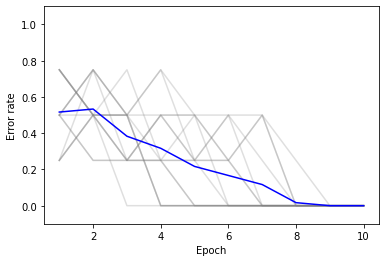

In [82]:
plot_learning_curve(error_mat)

## Task 4 - Experiments with the Perceptron

Now, we want to see whether the perceptron learns and performs similarly to humans in a categorisation task. 

In the following, an experiment by Medin and Schwanenflugel (1981) will be described. The paper can be downloaded from Moodle. The main focus is on experiment 1 in the paper. 

### Task 4.1

Describe the hypothesis that was developed and tested with experiment 1.

*write your answer in this cell*

### Task 4.2

Describe the experiment set-up and procedure of experiment 1. How many participants were there? What was their task? How many trials did they do? What was measured?

*write your answer in this cell*

### Task 4.3

Describe the stimuli used in experiment 1. How exactly do the stimuli differ and what do they look like? 

*write your answer in this cell*

The stimuli from experiment 1 are shown again here. These tables correspond exactly to the tables shown in the paper.

<h3>Class 1 - Linearly Separable</h3>
<br><br>

<div style="margin: 1; cellspacing:10; width: 800px; display: block;">						
<table style="float:left; width:390px;">
  <tr>
    <th class="tg-031e" colspan="5"><center>CATEGORY A</center><br></th>
  </tr>
  <tr>
    <th class="tg-031e"></th>
    <th class="tg-031e" colspan="4"><center>Dimensions</center></th>
  </tr>
  <tr>
    <td class="tg-031e"><center><b>Exemplar</b></center></td>
    <td class="tg-031e" colspan="4"></td>
  </tr>
  <tr>
    <td class="tg-031e"></td>
    <td class="tg-031e"><center><b>D1</b></center></td>
    <td class="tg-031e"><center><b>D2</b></center></td>
    <td class="tg-031e"><center><b>D3</b></center></td>
    <td class="tg-s6z2"><center><b>D4</b></center></td>
  </tr>
  <tr>
    <td class="tg-031e"><center><b>A1</b></center></td>
    <td class="tg-031e"><center>1</center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-031e"><center>1</center></td>
    <td class="tg-s6z2"><center>1</center></td>
  </tr>
  <tr>
    <td class="tg-031e"><center><b>A2</b></center></td>
    <td class="tg-031e"><center>1</center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-031e"><center>1</center></td>
    <td class="tg-s6z2"><center>0</center></td>
  </tr>
  <tr>
    <td class="tg-031e"><center><b>A3</b></center></td>
    <td class="tg-031e"><center>1</center></td>
    <td class="tg-031e"><center>1</center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-s6z2"><center>1</center></td>
  </tr>
  <tr>
    <td class="tg-031e"><center><b>A4</b></center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-031e"><center>1</center></td>
    <td class="tg-031e"><center>1</center></td>
    <td class="tg-s6z2"><center>0</center></td>
  </tr>
</table>
</div>
<div style="margin: 1;  cellspacing:10; width: 800px; display: block;">	
  <table style="float:right; width:390px;">
    <tr>
    <th class="tg-031e" colspan="5"><center>CATEGORY B</center><br></th>
  </tr>
  <tr>
    <th class="tg-031e"></th>
    <th class="tg-031e" colspan="4"><center>Dimensions</center></th>
  </tr>
  <tr>
    <td class="tg-031e"><center><b>Exemplar</b></center></td>
    <td class="tg-031e" colspan="4"></td>
  </tr>
  <tr>
    <td class="tg-031e"></td>
    <td class="tg-031e"><center><b>D1</b></center></td>
    <td class="tg-031e"><center><b>D2</b></center></td>
    <td class="tg-031e"><center><b>D3</b></center></td>
    <td class="tg-s6z2"><center><b>D4</b></center></td>
  </tr>
  <tr>
    <td class="tg-031e"><center><b>B1</b></center></td>
    <td class="tg-031e"><center>1</center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-s6z2"><center>1</center></td>
  </tr>
  <tr>
    <td class="tg-031e"><center><b>B2</b></center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-031e"><center>1</center></td>
    <td class="tg-s6z2"><center>0</center></td>
  </tr>
  <tr>
    <td class="tg-031e"><center><b>B3</b></center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-031e"><center>1</center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-s6z2"><center>0</center></td>
  </tr>
  <tr>
    <td class="tg-031e"><center><b>B4</b></center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-s6z2"><center>1</center></td>
  </tr>
</table>
</div>

<h3>Class 2 - Not Linearly Separable</h3>
<br><br>

<div style="margin: 1; cellspacing:10; width: 800px; display: block;">						
<table style="float:left; width:390px;">
  <tr>
    <th class="tg-031e" colspan="5"><center>CATEGORY A</center><br></th>
  </tr>
  <tr>
    <th class="tg-031e"></th>
    <th class="tg-031e" colspan="4"><center>Dimensions</center></th>
  </tr>
  <tr>
    <td class="tg-031e"><center><b>Exemplar</b></center></td>
    <td class="tg-031e" colspan="4"></td>
  </tr>
  <tr>
    <td class="tg-031e"></td>
    <td class="tg-031e"><center><b>D1</b></center></td>
    <td class="tg-031e"><center><b>D2</b></center></td>
    <td class="tg-031e"><center><b>D3</b></center></td>
    <td class="tg-s6z2"><center><b>D4</b></center></td>
  </tr>
  <tr>
    <td class="tg-031e"><center><b>A1</b></center></td>
    <td class="tg-031e"><center>1</center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-s6z2"><center>0</center></td>
  </tr>
  <tr>
    <td class="tg-031e"><center><b>A2</b></center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-031e"><center>1</center></td>
    <td class="tg-031e"><center>1</center></td>
    <td class="tg-s6z2"><center>1</center></td>
  </tr>
  <tr>
    <td class="tg-031e"><center><b>A3</b></center></td>
    <td class="tg-031e"><center>1</center></td>
    <td class="tg-031e"><center>1</center></td>
    <td class="tg-031e"><center>1</center></td>
    <td class="tg-s6z2"><center>0</center></td>
  </tr>
  <tr>
    <td class="tg-031e"><center><b>A4</b></center></td>
    <td class="tg-031e"><center>1</center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-031e"><center>1</center></td>
    <td class="tg-s6z2"><center>1</center></td>
  </tr>
</table>
</div>
<div style="margin: 1;  cellspacing:10; width: 800px; display: block;">	
  <table style="float:right; width:390px;">
    <tr>
    <th class="tg-031e" colspan="5"><center>CATEGORY B</center><br></th>
  </tr>
  <tr>
    <th class="tg-031e"></th>
    <th class="tg-031e" colspan="4"><center>Dimensions</center></th>
  </tr>
  <tr>
    <td class="tg-031e"><center><b>Exemplar</b></center></td>
    <td class="tg-031e" colspan="4"></td>
  </tr>
  <tr>
    <td class="tg-031e"></td>
    <td class="tg-031e"><center><b>D1</b></center></td>
    <td class="tg-031e"><center><b>D2</b></center></td>
    <td class="tg-031e"><center><b>D3</b></center></td>
    <td class="tg-s6z2"><center><b>D4</b></center></td>
  </tr>
  <tr>
    <td class="tg-031e"><center><b>B1</b></center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-031e"><center>1</center></td>
    <td class="tg-031e"><center>1</center></td>
    <td class="tg-s6z2"><center>0</center></td>
  </tr>
  <tr>
    <td class="tg-031e"><center><b>B2</b></center></td>
    <td class="tg-031e"><center>1</center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-s6z2"><center>1</center></td>
  </tr>
  <tr>
    <td class="tg-031e"><center><b>B3</b></center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-s6z2"><center>0</center></td>
  </tr>
  <tr>
    <td class="tg-031e"><center><b>B4</b></center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-031e"><center>0</center></td>
    <td class="tg-s6z2"><center>1</center></td>
  </tr>
</table>
</div>

### Task 4.4

Extract the stimuli shown in the tables from experiment 1 so that they can be used in the following.

In [83]:
# enter your data variables here.
# ls=linear seperable 
inputs_ls = np.array([[1,0,1,1],[1,0,1,0],[1,1,0,1],[0,1,1,0],[1,0,0,1],[0,0,1,0],[0,1,0,0],[0,0,0,1]])
targets_ls = np.array([1,1,1,1,0,0,0,0])
inputs_nls = np.array([[1,0,0,0],[0,1,1,1],[1,1,1,0],[1,0,1,1],[0,1,1,0],[1,0,0,1],[0,0,0,0],[0,0,0,1]])
targets_nls = np.array([1,1,1,1,0,0,0,0])

### Task 4.5

Use the stimuli to train Perceptrons on the linearly separable class (Class 1). Make use of the functions you defined above.

Train the Perceptrons as the participants were trained in the study by Medin and Schwanenflugel (1981):

1. Set the number of epochs according to the experiment. 
2. Train the same number of perceptrons as there were participants. 
3. Present the exemplars in a random order.

In [84]:
# write your code here

n_perceptrons=32
n_epochs=16

error_mat=np.empty((n_perceptrons, n_epochs))

for p in range(n_perceptrons):
    weights, bias, epoch_errors=train_n_epochs(
        n_epochs=n_epochs,
        inputs=inputs_ls,
        targets=targets_ls,
        weights=np.array([0.0,0.0,0.0,0.0]),
        bias=0.0,
        verbose=False,
        shuffle=True
    )

    error_mat[p, :]=epoch_errors

Now, visualise the learning curves of the perceptrons in this experiment.

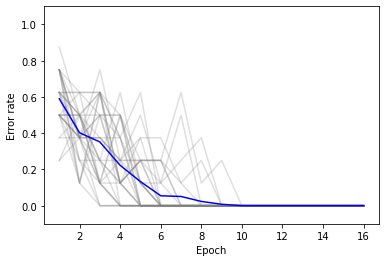

In [85]:
plot_learning_curve(error_mat)

### Task 4.6

Repeat Task 4.5 with the *non-* linearly separable class (Class 2). 

In [86]:
# write your code here

n_perceptrons= 32
n_epochs= 16

error_mat=np.empty((n_perceptrons,n_epochs))

for p in range(n_perceptrons):
    weights, bias, epoch_errors =train_n_epochs(
        n_epochs=n_epochs,
        inputs=inputs_nls,
        targets=targets_nls,
        weights=np.array([0.0, 0.0, 0.0,0.0]),
        bias=0.0,
        verbose=False,
        shuffle=True
    )
    error_mat[p, :]=epoch_errors

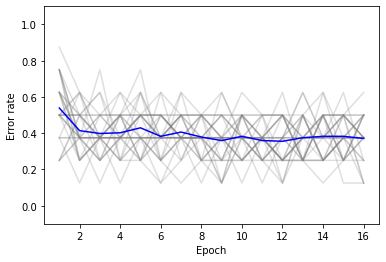

In [87]:
plot_learning_curve(error_mat)

## Task 5 - Results

Summarise the results of your Perceptron experiment. What did you notice? Can you compare the performance (error rate) with that of the study? Why or why not? 

Discuss and interpret the observations you made during the experiment.

*write your answer in this cell*

## Task 6 - Further thinking

Finally, think about the following questions:

Is the perceptron a good model for human category learning? Why? Why not? 

Is the way the perceptron learns the logical rule AND the same as humans? 

*write your answer in this cell*